In [2]:
from fastai2.text.all import *
import pandas as pd

# Tabular

In [2]:
path = Path('./')

In [3]:
df = pd.read_csv('train.csv')
dfval = pd.read_csv('val.csv')

In [7]:
dftest = pd.read_csv('test.csv')
dftest.shape

(300000, 1)

In [4]:
df.head()

,text,label
0,"A captive portal is a web page accessed with a web browser that is displayed to newly connected users of a Wi-Fi network before they are granted broader access to network resources. Captive portals are commonly used to present a landing or log-in page which may require authentication, payment, acceptance",unscrambled
1,"Honeymoon Ahead is a 1945 American comedy film directed by Reginald Le Borg and written by Val Burton and Elwood Ullman. The film stars Allan Jones, Grace McDonald, Raymond Walburn, Vivian Austin, Jack Overman and Murray Alper. The film was released on May 11, 1945, by Universal Pictures. Plot Cast",unscrambled
2,Pass Creek Bridge is a covered bridge in the city of Drain in Douglas County in the U.S. state of Oregon. It originally carried stagecoaches over Pass Creek before being moved a few hundred feet from its original location in 1987 and reassembled behind the Drain Civic Center. From then,unscrambled
3,A machine-readable passport (MRP) is a machine-readable travel document (MRTD) with the data on the identity page encoded in optical character recognition format. Many countries began to issue machine-readable travel documents in the 1980s. Most travel passports worldwide are MRPs. They are standardized by the ICAO Document 9303 (endorsed by,unscrambled
4,Three Jane's 1997 and by Kevin Addiction directed was a the rock Tour. written and about documentary Relapse Ford is It Days B. Smith and debuted at the 1999 Slamdance International Film Festival and made rounds at small theaters in major cities in the United States. This DVD version,scrambled


In [5]:
dfval['label'].value_counts()

scrambled      50000
unscrambled    50000
Name: label, dtype: int64

In [ ]:
dls = TextDataLoaders.from_df(df, path=path, text_col='text', label_col='label', is_lm=False, valid_pct=0.1, bs=32)

Process Process-8:
Process Process-5:
Traceback (most recent call last):


In [7]:
dls.show_batch(max_n=1)

,text,text_
0,"xxbos xxmaj star xxmaj trek : xxmaj xxunk xxmaj pact is a series of eight novels set in the universe of the xxmaj american science fiction franchise xxmaj star xxmaj trek . xxmaj it features a series of crossovers between several different series of novels , including xxmaj the xxmaj next xxmaj generation , xxmaj deep xxmaj space xxmaj nine and xxmaj titan . xxmaj the xxmaj xxunk xxmaj pact itself has","xxmaj star xxmaj trek : xxmaj xxunk xxmaj pact is a series of eight novels set in the universe of the xxmaj american science fiction franchise xxmaj star xxmaj trek . xxmaj it features a series of crossovers between several different series of novels , including xxmaj the xxmaj next xxmaj generation , xxmaj deep xxmaj space xxmaj nine and xxmaj titan . xxmaj the xxmaj xxunk xxmaj pact itself has been"


In [8]:
# learn = language_model_learner(dls, AWD_LSTM, metrics=[accuracy, Perplexity()], path=path, wd=0.1)

In [9]:
learn.summary()

SequentialRNN (Input shape: ['32 x 72'])
Layer (type)         Output Shape         Param #    Trainable 
RNNDropout           32 x 72 x 400        0          False     
________________________________________________________________
RNNDropout           32 x 72 x 1152       0          False     
________________________________________________________________
RNNDropout           32 x 72 x 1152       0          False     
________________________________________________________________
Linear               32 x 72 x 60008      24,063,208 True      
________________________________________________________________
RNNDropout           32 x 72 x 400        0          False     
________________________________________________________________

Total params: 24,063,208
Total trainable params: 24,063,208
Total non-trainable params: 0

Optimizer used: <function Adam at 0x7fd3403b7dc0>
Loss function: FlattenedLoss of CrossEntropyLoss()

Model frozen up to parameter group number 3

Callbacks:


SuggestedLRs(lr_min=0.010000000149011612, lr_steep=6.309573450380412e-07)

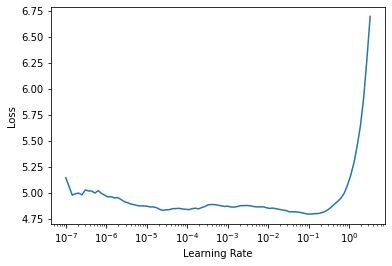

In [10]:
learn.lr_find()

In [11]:
learn.fit_one_cycle(3, 1e-2)

KeyboardInterrupt: 

In [9]:
learn.unfreeze()
learn.fit_one_cycle(10, 1e-3)

RuntimeError: CUDA out of memory. Tried to allocate 1.03 GiB (GPU 0; 5.93 GiB total capacity; 4.14 GiB already allocated; 297.06 MiB free; 4.83 GiB reserved in total by PyTorch) (malloc at /opt/conda/conda-bld/pytorch_1591914858187/work/c10/cuda/CUDACachingAllocator.cpp:289)
frame #0: c10::Error::Error(c10::SourceLocation, std::string const&) + 0x4e (0x7ff98c52eb5e in /home/ashwin/miniconda3/envs/blitz/lib/python3.8/site-packages/torch/lib/libc10.so)
frame #1: <unknown function> + 0x1f39d (0x7ff98c77a39d in /home/ashwin/miniconda3/envs/blitz/lib/python3.8/site-packages/torch/lib/libc10_cuda.so)
frame #2: <unknown function> + 0x2058e (0x7ff98c77b58e in /home/ashwin/miniconda3/envs/blitz/lib/python3.8/site-packages/torch/lib/libc10_cuda.so)
frame #3: at::native::empty_cuda(c10::ArrayRef<long>, c10::TensorOptions const&, c10::optional<c10::MemoryFormat>) + 0x291 (0x7ff9383e9401 in /home/ashwin/miniconda3/envs/blitz/lib/python3.8/site-packages/torch/lib/libtorch_cuda.so)
frame #4: <unknown function> + 0xdc454b (0x7ff93669c54b in /home/ashwin/miniconda3/envs/blitz/lib/python3.8/site-packages/torch/lib/libtorch_cuda.so)
frame #5: <unknown function> + 0xe0de37 (0x7ff9366e5e37 in /home/ashwin/miniconda3/envs/blitz/lib/python3.8/site-packages/torch/lib/libtorch_cuda.so)
frame #6: <unknown function> + 0xdd2339 (0x7ff9615f4339 in /home/ashwin/miniconda3/envs/blitz/lib/python3.8/site-packages/torch/lib/libtorch_cpu.so)
frame #7: <unknown function> + 0xdd2677 (0x7ff9615f4677 in /home/ashwin/miniconda3/envs/blitz/lib/python3.8/site-packages/torch/lib/libtorch_cpu.so)
frame #8: <unknown function> + 0xb7e60e (0x7ff9613a060e in /home/ashwin/miniconda3/envs/blitz/lib/python3.8/site-packages/torch/lib/libtorch_cpu.so)
frame #9: at::native::empty_like(at::Tensor const&, c10::TensorOptions const&, c10::optional<c10::MemoryFormat>) + 0x9e0 (0x7ff9613a6f00 in /home/ashwin/miniconda3/envs/blitz/lib/python3.8/site-packages/torch/lib/libtorch_cpu.so)
frame #10: <unknown function> + 0xe912d1 (0x7ff9616b32d1 in /home/ashwin/miniconda3/envs/blitz/lib/python3.8/site-packages/torch/lib/libtorch_cpu.so)
frame #11: <unknown function> + 0xee45d3 (0x7ff9617065d3 in /home/ashwin/miniconda3/envs/blitz/lib/python3.8/site-packages/torch/lib/libtorch_cpu.so)
frame #12: <unknown function> + 0x2a0de12 (0x7ff9382e5e12 in /home/ashwin/miniconda3/envs/blitz/lib/python3.8/site-packages/torch/lib/libtorch_cuda.so)
frame #13: at::Tensor at::native::(anonymous namespace)::host_softmax_backward<at::native::(anonymous namespace)::LogSoftMaxBackwardEpilogue, true>(at::Tensor const&, at::Tensor const&, long, bool) + 0x163 (0x7ff938316ac3 in /home/ashwin/miniconda3/envs/blitz/lib/python3.8/site-packages/torch/lib/libtorch_cuda.so)
frame #14: at::native::log_softmax_backward_cuda(at::Tensor const&, at::Tensor const&, long, at::Tensor const&) + 0x99 (0x7ff9382e65f9 in /home/ashwin/miniconda3/envs/blitz/lib/python3.8/site-packages/torch/lib/libtorch_cuda.so)
frame #15: <unknown function> + 0xdcf1d0 (0x7ff9366a71d0 in /home/ashwin/miniconda3/envs/blitz/lib/python3.8/site-packages/torch/lib/libtorch_cuda.so)
frame #16: <unknown function> + 0xe22a86 (0x7ff961644a86 in /home/ashwin/miniconda3/envs/blitz/lib/python3.8/site-packages/torch/lib/libtorch_cpu.so)
frame #17: <unknown function> + 0x2a07e6c (0x7ff963229e6c in /home/ashwin/miniconda3/envs/blitz/lib/python3.8/site-packages/torch/lib/libtorch_cpu.so)
frame #18: <unknown function> + 0xe22a86 (0x7ff961644a86 in /home/ashwin/miniconda3/envs/blitz/lib/python3.8/site-packages/torch/lib/libtorch_cpu.so)
frame #19: torch::autograd::generated::LogSoftmaxBackward::apply(std::vector<at::Tensor, std::allocator<at::Tensor> >&&) + 0x1c9 (0x7ff962e25f49 in /home/ashwin/miniconda3/envs/blitz/lib/python3.8/site-packages/torch/lib/libtorch_cpu.so)
frame #20: <unknown function> + 0x2ae7df5 (0x7ff963309df5 in /home/ashwin/miniconda3/envs/blitz/lib/python3.8/site-packages/torch/lib/libtorch_cpu.so)
frame #21: torch::autograd::Engine::evaluate_function(std::shared_ptr<torch::autograd::GraphTask>&, torch::autograd::Node*, torch::autograd::InputBuffer&) + 0x16f3 (0x7ff9633070f3 in /home/ashwin/miniconda3/envs/blitz/lib/python3.8/site-packages/torch/lib/libtorch_cpu.so)
frame #22: torch::autograd::Engine::thread_main(std::shared_ptr<torch::autograd::GraphTask> const&, bool) + 0x3d2 (0x7ff963307ed2 in /home/ashwin/miniconda3/envs/blitz/lib/python3.8/site-packages/torch/lib/libtorch_cpu.so)
frame #23: torch::autograd::Engine::thread_init(int) + 0x39 (0x7ff963300549 in /home/ashwin/miniconda3/envs/blitz/lib/python3.8/site-packages/torch/lib/libtorch_cpu.so)
frame #24: torch::autograd::python::PythonEngine::thread_init(int) + 0x38 (0x7ff966440b08 in /home/ashwin/miniconda3/envs/blitz/lib/python3.8/site-packages/torch/lib/libtorch_python.so)
frame #25: <unknown function> + 0xc819d (0x7ff99f74c19d in /home/ashwin/miniconda3/envs/blitz/bin/../lib/libstdc++.so.6)
frame #26: <unknown function> + 0x9422 (0x7ff9a223c422 in /usr/lib/libpthread.so.0)
frame #27: clone + 0x43 (0x7ff9a216bbf3 in /usr/lib/libc.so.6)
